### Contents:
- [EDA](#EDA)
- [Data Cleaning](#Data-Cleaning)
- [Feature Engineering](#Feature-Engineering)
- [Feature Selection](#Feature-Selection)
- [Regression Model](#Regression-Model)
- [Classification Model](#Classification-Model)
    


In [179]:
# Library Imports
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

## EDA

### Understanding the Dataset
- Dataset Description: Starting by understanding the dataset's structure, such as the number of rows and columns, types of variables (numerical, categorical), and the presence of any timestamps or geographical data.

- Target Variable: Identify the target variable, which in this case is property price.

In [180]:
# Load the dataset
file_path = 'madrid_properties.xlsx'
df = pd.read_excel(file_path) 

In [181]:
# Display basic information about the dataset
dataset_info = df.info() # number of rows, number of columns, column names, data types, memory usage

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17857 entries, 0 to 17856
Data columns (total 26 columns):
 #   Column                                           Non-Null Count  Dtype  
---  ------                                           --------------  -----  
 0   Unnamed: 0                                       17857 non-null  int64  
 1   inm_floor                                        14067 non-null  float64
 2   inm_size                                         16090 non-null  float64
 3   inm_price                                        17857 non-null  int64  
 4   inm_longitude                                    17857 non-null  float64
 5   inm_latitude                                     17857 non-null  float64
 6   inm_barrio                                       16063 non-null  object 
 7   inm_distrito                                     16110 non-null  object 
 8   his_price                                        17857 non-null  int64  
 9   his_quarterly_variation     

In [182]:
# print the number of rows and columns
print('Number of rows and columns:', df.shape)
# print the head (first 5 rows) of the dataset
print(df.head())

Number of rows and columns: (17857, 26)
   Unnamed: 0  inm_floor  inm_size  inm_price  inm_longitude  inm_latitude   
0           0        3.0     141.0     990000      -3.656875     40.464347  \
1           1        2.0     159.0     940000      -3.703523     40.419427   
2           2        NaN       NaN     549000      -3.669626     40.435362   
3           3        2.0     232.0     750000      -3.720619     40.424164   
4           4        4.0     183.0    1550000      -3.705909     40.413214   

    inm_barrio       inm_distrito  his_price  his_quarterly_variation  ...   
0     Canillas          Hortaleza       3250                      2.2  ...  \
1  Universidad             Centro       5106                      1.4  ...   
2   Guindalera          Salamanca       4100                      0.6  ...   
3    Argüelles  Moncloa - Aravaca       4773                      0.5  ...   
4          Sol             Centro       4739                     -5.5  ...   

   dem_TasaDeParo  dem

## Observations:
Described Features:
- inm_floor: Number of floors (14,067 non-null values).
- inm_size: Property size in square meters (16,090 non-null values).
- inm_price: Price of the property (17,857 non-null values) - This is the target variable.
- inm_longitude: Longitude coordinates (17,857 non-null values).
- inm_latitude: Latitude coordinates (17,857 non-null values).
- inm_barrio: Property neighborhood name (16,063 non-null values).
- inm_distrito: Property district name (16,110 non-null values).
- his_price: Historical price of the property (17,857 non-null values).
- his_quarterly_variation: Historical quarterly variation (17,857 non-null values).
- his_annual_variation: Historical annual variation (17,857 non-null values).
- his_monthly_variation: Historical annual variation (17,857 non-null values).

Other Features: There are several other features, many related to demographic information (like indices of youth, employment rates, average household size, education levels, etc.), with all having 17,857 non-null values. It seems these demographic features are tied to the location of the property.

Data Types: The dataset comprises a mix of numerical (floats and integers) and categorical (object) data types.
Given the presence of non-null values in critical features like inm_price, inm_size, inm_longitude, and inm_latitude, these will likely be key in our analysis. However, there are missing values in some columns like inm_floor, inm_size, inm_barrio, and inm_distrito, which will need to be addressed in the data cleaning step.

## Data Cleaning
- Missing Values: Identify and handle missing values. Options include imputing missing values, removing rows or columns with too many missing values, or using algorithms that can handle missing data.
- Outliers: Detect and manage outliers, as they can skew the results of a regression analysis. Techniques include using IQR (Interquartile Range) or Z-scores.
- Duplicate Records: Check for and remove any duplicate entries to prevent biased results.

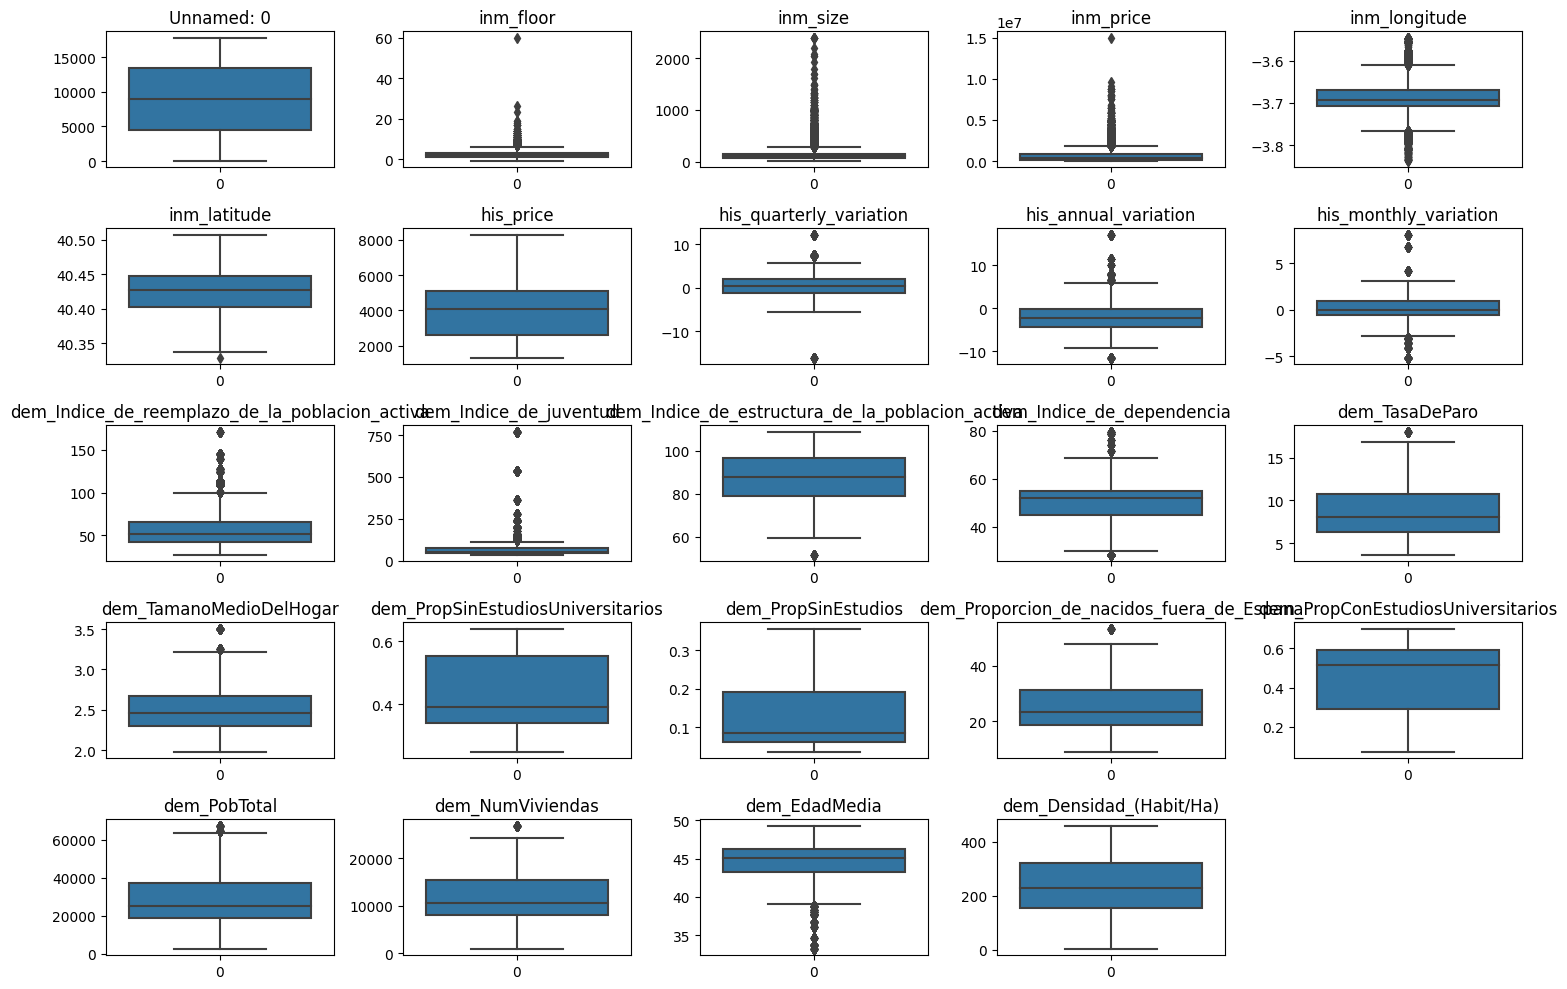

(17857,
 26,
 0,
 0,
 Unnamed: 0                                          0.000000
 inm_floor                                          21.224170
 inm_size                                            9.895279
 inm_price                                           0.000000
 inm_longitude                                       0.000000
 inm_latitude                                        0.000000
 inm_barrio                                         10.046480
 inm_distrito                                        9.783278
 his_price                                           0.000000
 his_quarterly_variation                             0.000000
 his_annual_variation                                0.000000
 his_monthly_variation                               0.000000
 dem_Indice_de_reemplazo_de_la_poblacion_activa      0.000000
 dem_Indice_de_juventud                              0.000000
 dem_Indice_de_estructura_de_la_poblacion_activa     0.000000
 dem_Indice_de_dependencia                       

In [183]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Step 1: Handling Missing Values
# Calculate the percentage of missing values for each column
missing_percentage = df.isnull().mean() * 100

# Decide on a threshold for removing columns with too many missing values
threshold = 30  # columns with more than 30% missing values will be dropped
columns_to_drop = missing_percentage[missing_percentage > threshold].index

# Drop these columns
df_cleaned = df.drop(columns=columns_to_drop)

# Impute missing values in the remaining columns
# For simplicity, impute numerical columns with median and categorical with mode
for col in df_cleaned.columns:
    if df_cleaned[col].dtype == 'object':
        df_cleaned[col].fillna(df_cleaned[col].mode()[0], inplace=True)
    else:
        df_cleaned[col].fillna(df_cleaned[col].median(), inplace=True)

# Step 2: Detecting and Managing Outliers with Box Plots
# Select numerical columns for outlier detection
numerical_cols = df_cleaned.select_dtypes(include=['float64', 'int64']).columns

# Plot boxplots before handling outliers
plt.figure(figsize=(15,10))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(5, 5, i)
    sns.boxplot(df_cleaned[col])
    plt.title(col)
    plt.tight_layout()
plt.show()

# Apply IQR method to handle outliers
Q1 = df_cleaned[numerical_cols].quantile(0.25)
Q3 = df_cleaned[numerical_cols].quantile(0.75)
IQR = Q3 - Q1

# Cap and floor values outside 1.5*IQR
df_outliers_handled = df_cleaned.copy()
df_outliers_handled[numerical_cols] = df_cleaned[numerical_cols].clip(Q1 - 1.5 * IQR, Q3 + 1.5 * IQR, axis=1)

# Step 3: Removing Duplicate Records
df_final = df_outliers_handled.drop_duplicates()

# Summarize changes
num_rows_cleaned, num_cols_cleaned = df_final.shape
num_rows, num_cols = df.shape
num_dropped_columns = num_cols - num_cols_cleaned
num_dropped_rows = num_rows - num_rows_cleaned

num_rows_cleaned, num_cols_cleaned, num_dropped_columns, num_dropped_rows, missing_percentage, columns_to_drop


#### Data Cleaning Conclusions:

##### Missing Values:
- No columns were dropped based on the threshold of 30% missing values, as none exceeded this limit.
- Missing values in numerical columns were imputed with the median, and in categorical columns with the mode.

##### Outliers:
- Box plots were generated for each numerical feature to visualize outliers.
- The Interquartile Range (IQR) method was used to cap and floor extreme values. This method adjusts values that are below Q1 - 1.5 * IQR or above Q3 + 1.5 * IQR, reducing the impact of outliers.

##### Duplicate Records:
- No duplicate records were found.

## Feature Engineering
- Normalization/Standardization: Apply normalization or standardization to the numeric data to bring everything to a similar scale, which is important for many regression models.
- Encoding Categorical Variables: Convert categorical variables into a format that can be provided to machine learning models (like one-hot encoding or label encoding).



In [184]:
from sklearn.preprocessing import StandardScaler
# Correcting the selection of numerical columns to avoid including any non-numeric data
numerical_cols_corrected = df_final.select_dtypes(include=[np.number]).columns

# Re-initialize the StandardScaler
scaler_corrected = StandardScaler()

# Apply standardization to the corrected numerical columns
df_standardized = df_final.copy()
df_standardized[numerical_cols_corrected] = scaler_corrected.fit_transform(df_final[numerical_cols_corrected])

df_standardized.head()  # Display the first few rows of the corrected standardized dataframe



,Unnamed: 0,inm_floor,inm_size,inm_price,inm_longitude,inm_latitude,inm_barrio,inm_distrito,his_price,his_quarterly_variation,...,dem_TasaDeParo,dem_TamanoMedioDelHogar,dem_PropSinEstudiosUniversitarios,dem_PropSinEstudios,dem_Proporcion_de_nacidos_fuera_de_Espana,dem_PropConEstudiosUniversitarios,dem_PobTotal,dem_NumViviendas,dem_EdadMedia,dem_Densidad_(Habit/Ha)
0,-1.731954,0.353031,0.249696,0.707196,0.899676,1.268064,Canillas,Hortaleza,-0.467744,0.783804,...,-0.003294,0.146014,0.480732,0.667583,-1.104643,0.380019,0.964557,0.874458,0.254895,-0.582782
1,-1.731760,-0.244059,0.493683,0.615596,-0.435955,-0.172891,Universidad,Centro,0.699661,0.426994,...,0.089400,-1.735760,-0.457705,-0.526112,0.855855,0.476608,0.395708,1.017189,-0.372172,0.971279
2,-1.731566,-0.244059,-0.333163,-0.100718,0.534593,0.338279,Guindalera,Salamanca,0.066897,0.070185,...,-0.425985,-0.392378,-0.648239,-0.701109,-0.778624,0.673926,1.077100,1.193815,0.851109,0.249322
3,-1.731372,-0.244059,1.483186,0.267515,-0.925449,-0.020946,Argüelles,Moncloa - Aravaca,0.490207,0.025584,...,-0.667008,-0.534647,-0.851194,-0.752432,-0.455985,0.824230,-0.293886,-0.192260,1.067581,0.725882
4,-1.731178,0.950120,0.818999,1.733119,-0.504280,-0.372197,Sol,Centro,0.468822,-2.650487,...,0.106820,-1.673147,-0.025381,-0.546521,1.726028,0.213945,-1.581922,-1.447844,0.044807,-0.507194


In [185]:
from sklearn.preprocessing import OneHotEncoder

# Identifying the categorical columns
categorical_cols = df_standardized.select_dtypes(include=['object']).columns

# Initialize the OneHotEncoder
encoder = OneHotEncoder(sparse=False, drop='first')  # drop='first' to avoid multicollinearity

# Apply OneHotEncoding to the categorical columns
encoded_data = encoder.fit_transform(df_standardized[categorical_cols])

# Create a DataFrame with the encoded columns
encoded_cols = encoder.get_feature_names_out(categorical_cols)
df_encoded = pd.DataFrame(encoded_data, columns=encoded_cols)

# Drop original categorical columns and concatenate the encoded columns
df_final_encoded = df_standardized.drop(categorical_cols, axis=1)
df_final_encoded = pd.concat([df_final_encoded, df_encoded], axis=1)

df_final_encoded.head()  # Display the first few rows of the DataFrame with encoded categorical variables



/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


,Unnamed: 0,inm_floor,inm_size,inm_price,inm_longitude,inm_latitude,his_price,his_quarterly_variation,his_annual_variation,his_monthly_variation,...,inm_distrito_Moratalaz,inm_distrito_Puente de Vallecas,inm_distrito_Retiro,inm_distrito_Salamanca,inm_distrito_San Blas - Canillejas,inm_distrito_Tetuán,inm_distrito_Usera,inm_distrito_Vicálvaro,inm_distrito_Villa de Vallecas,inm_distrito_Villaverde
0,-1.731954,0.353031,0.249696,0.707196,0.899676,1.268064,-0.467744,0.783804,0.602504,1.518144,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,-1.731760,-0.244059,0.493683,0.615596,-0.435955,-0.172891,0.699661,0.426994,-0.669768,0.038580,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,-1.731566,-0.244059,-0.333163,-0.100718,0.534593,0.338279,0.066897,0.070185,-0.614452,-0.183355,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,-1.731372,-0.244059,1.483186,0.267515,-0.925449,-0.020946,0.490207,0.025584,-0.503819,0.186536,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,-1.731178,0.950120,0.818999,1.733119,-0.504280,-0.372197,0.468822,-2.650487,-0.946349,-0.849158,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Data Exploration
- Statistical Summary: Look at basic statistical measures like mean, median, mode, standard deviation, etc., for each column.

- Correlation Analysis: Perform a correlation analysis to understand the relationships between different variables, especially how they relate to the property price.

In [186]:
# Step 1: Statistical Summary
statistical_summary = df_final_encoded.describe()

# Step 2: Correlation Analysis
correlation_matrix = df_final_encoded.corr()

# Displaying the statistical summary and correlation matrix
statistical_summary, correlation_matrix['inm_price'].sort_values(ascending=False)



(         Unnamed: 0     inm_floor      inm_size     inm_price  inm_longitude   
 count  1.785700e+04  1.785700e+04  1.785700e+04  1.785700e+04   1.785700e+04  \
 mean  -2.546606e-17  2.467024e-17  8.748983e-17  3.790065e-17   2.035136e-14   
 std    1.000028e+00  1.000028e+00  1.000028e+00  1.000028e+00   1.000028e+00   
 min   -1.731954e+00 -2.035327e+00 -1.553099e+00 -1.077177e+00  -2.229135e+00   
 25%   -8.659769e-01 -8.411480e-01 -7.262531e-01 -7.585914e-01  -5.690121e-01   
 50%    0.000000e+00 -2.440586e-01 -3.331627e-01 -4.286473e-01  -1.202826e-01   
 75%    8.659769e-01  3.530307e-01  4.259086e-01  4.488832e-01   5.377367e-01   
 max    1.731954e+00  2.144299e+00  2.154151e+00  2.260095e+00   2.197860e+00   
 
        inm_latitude     his_price  his_quarterly_variation   
 count  1.785700e+04  1.785700e+04             1.785700e+04  \
 mean   7.994392e-14 -1.018642e-16             2.029326e-17   
 std    1.000028e+00  1.000028e+00             1.000028e+00   
 min   -2.839923e

#### Data Exploration Conclusions:

##### Statistical Summary:
The statistical summary provides key measures such as mean, standard deviation, minimum, and maximum values for each column. Since the data has been standardized, the means are approximately zero, and standard deviations are close to one.

##### Correlation Analysis:
The correlation matrix focuses on how different variables relate to the property price (inm_price). Here are some key findings:
- Positive Correlation: Variables like inm_size (property size) and his_price (historical price) show a strong positive correlation with the property price. This suggests that larger properties and those with higher historical prices tend to be priced higher.
- Negative Correlation: Variables like dem_TasaDeParo (unemployment rate), dem_PropSinEstudiosUniversitarios (proportion without university studies), and dem_PropSinEstudios (proportion without studies) are negatively correlated with property prices, indicating that higher values in these demographic factors are associated with lower property prices.

## Feature Selection

In [187]:
from sklearn.feature_selection import SelectKBest, f_regression

# Defining the target variable and features
X = df_final_encoded.drop('inm_price', axis=1)
y = df_final_encoded['inm_price']

# Initialize SelectKBest with f_regression to find best k features
selector = SelectKBest(score_func=f_regression, k='all')

# Fit and transform the data
X_new = selector.fit_transform(X, y)

# Get the scores for each feature
feature_scores = selector.scores_

# Creating a DataFrame to display feature names and their corresponding scores
feature_scores_df = pd.DataFrame({'Feature': X.columns, 'Score': feature_scores})
feature_scores_df = feature_scores_df.sort_values(by='Score', ascending=False)

feature_scores_df.head(10)  # Displaying top 10 features



,Feature,Score
2,inm_size,47226.632549
13,dem_TasaDeParo,14047.378181
15,dem_PropSinEstudiosUniversitarios,13969.348900
5,his_price,12349.182607
18,dem_PropConEstudiosUniversitarios,10939.929787
16,dem_PropSinEstudios,10117.678543
19,dem_PobTotal,3529.656557
20,dem_NumViviendas,3175.725706
4,inm_latitude,3072.581392
17,dem_Proporcion_de_nacidos_fuera_de_Espana,1759.555101


In [188]:
# Selecting the top 10 features for the final DataFrame
top_features = feature_scores_df['Feature'].head(10).tolist()
df_final_selected = df_final_encoded[['inm_price'] + top_features]

df_final_selected.head()  # Display the first few rows of the final DataFrame with selected features



,inm_price,inm_size,dem_TasaDeParo,dem_PropSinEstudiosUniversitarios,his_price,dem_PropConEstudiosUniversitarios,dem_PropSinEstudios,dem_PobTotal,dem_NumViviendas,inm_latitude,dem_Proporcion_de_nacidos_fuera_de_Espana
0,0.707196,0.249696,-0.003294,0.480732,-0.467744,0.380019,0.667583,0.964557,0.874458,1.268064,-1.104643
1,0.615596,0.493683,0.089400,-0.457705,0.699661,0.476608,-0.526112,0.395708,1.017189,-0.172891,0.855855
2,-0.100718,-0.333163,-0.425985,-0.648239,0.066897,0.673926,-0.701109,1.077100,1.193815,0.338279,-0.778624
3,0.267515,1.483186,-0.667008,-0.851194,0.490207,0.824230,-0.752432,-0.293886,-0.192260,-0.020946,-0.455985
4,1.733119,0.818999,0.106820,-0.025381,0.468822,0.213945,-0.546521,-1.581922,-1.447844,-0.372197,1.726028


## Regression Model
### 1) estimate property prices as a regression problem
- Use algorithms seen so far in class. (we have only seen linear regression so far)

### Preparing for modeling
- Train/Test Split: Split the data into training and test sets. The training set will be used to train the model, while the test set will be used to evaluate the model's performance on unseen data.
- Cross-Validation: Perform cross-validation to ensure the model's performance is consistent across different subsets of the data.

In [189]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression

# Splitting the data into training and testing sets
X = df_final_selected.drop('inm_price', axis=1)
y = df_final_selected['inm_price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) # 80% training, 20% testing

# Setting up a Linear Regression model for cross-validation
model = LinearRegression()

# Cross-validation setup
cv_scores = cross_val_score(model, X_train, y_train, cv=5)

cv_scores.mean(), cv_scores.std()  # Displaying the mean and standard deviation of the cross-validation scores



(0.8345686660866386, 0.00392671886843272)

### Modeling and Evaluation
- Linear Regression: Train a linear regression model on the training set.
- Model Evaluation: Evaluate the model on the test set using metrics like RMSE (Root Mean Squared Error) and R2 score.


In [191]:
from sklearn.metrics import mean_squared_error, r2_score

# Training the Linear Regression model on the training set
model.fit(X_train, y_train)

# Predicting on the test set
y_pred = model.predict(X_test)

# Evaluating the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# print the error and r2 score
print('Mean Squared Error:', mse)
print('R-squared:', r2)


Mean Squared Error: 0.1640042062005936
R-squared: 0.8384209363544731


### Conclusions
inear Regression model shows strong predictive performance for this dataset. It's a robust model for predicting property prices based on the selected features. Further improvements can be explored through more complex models, hyperparameter tuning, or additional feature engineering. However, the current model is a good baseline and likely to provide reliable predictions.

## Classification Model
### 2) Analyze data and redefine the problem to create a classification one.
Use the following algorithms and analyze results:
- Perceptron Learning Algorithm
- Logistic Regression
- Generative Models (LDA, QDA)
- KNN

### To redefine the property price prediction problem into a classification one, we can categorize the property prices into distinct classes such as 'Low', 'Medium', and 'High'. 
We'll use percentiles to divide the property prices into three categories:

- Low Price Range: Prices below the 33rd percentile.
- Medium Price Range: Prices between the 33rd and 66th percentiles.
- High Price Range: Prices above the 66th percentile.

In [195]:
# Determining the percentiles to categorize the prices
low_price_threshold = df_final_encoded['inm_price'].quantile(0.33)
high_price_threshold = df_final_encoded['inm_price'].quantile(0.66)

# Function to categorize prices
def categorize_price(price):
    if price < low_price_threshold:
        return 'Low'
    elif price < high_price_threshold:
        return 'Medium'
    else:
        return 'High'

# Applying the function to create a new categorical target variable
df_final_encoded['price_category'] = df_final_encoded['inm_price'].apply(categorize_price)

# Display the distribution of the new categories
price_category_distribution = df_final_encoded['price_category'].value_counts(normalize=True)

price_category_distribution, df_final_encoded[['inm_price', 'price_category']].head()  # Displaying the first few rows with new category



(price_category
 High      0.340035
 Medium    0.330347
 Low       0.329619
 Name: proportion, dtype: float64,
    inm_price price_category
 0   0.707196           High
 1   0.615596           High
 2  -0.100718         Medium
 3   0.267515           High
 4   1.733119           High)

In [196]:
# Preparing for modeling and modeling
from sklearn.linear_model import Perceptron, LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report

# Preparing the data for classification
X_class = df_final_encoded.drop(['inm_price', 'price_category'], axis=1)
y_class = df_final_encoded['price_category']

# Splitting the data for classification models
X_train_class, X_test_class, y_train_class, y_test_class = train_test_split(X_class, y_class, test_size=0.2, random_state=42)

# Initialize models
perceptron = Perceptron(random_state=42)
logistic_regression = LogisticRegression(random_state=42, max_iter=1000)
lda = LinearDiscriminantAnalysis()
qda = QuadraticDiscriminantAnalysis()
knn = KNeighborsClassifier()

# Training and evaluating each model
models = [perceptron, logistic_regression, lda, qda, knn]
model_names = ['Perceptron', 'Logistic Regression', 'LDA', 'QDA', 'KNN']
scores = {}

for model, name in zip(models, model_names):
    model.fit(X_train_class, y_train_class)
    y_pred_class = model.predict(X_test_class)
    accuracy = accuracy_score(y_test_class, y_pred_class)
    scores[name] = accuracy

scores  # Displaying the accuracy of each model


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/discriminant_analysis.py:926: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


{'Perceptron': 0.7827547592385219,
 'Logistic Regression': 0.833986562150056,
 'LDA': 0.7875139977603584,
 'QDA': 0.5691489361702128,
 'KNN': 0.778555431131019}

### Model Performance
- Perceptron: Achieved an accuracy of approximately 78.3%. The Perceptron is a simple linear binary classifier, and this result suggests it performs reasonably well for this classification task.
- Logistic Regression: Showed the best performance with an accuracy of about 83.4%. This indicates that Logistic Regression, which works well for binary and multi-class classification problems, is a good fit for this task.
- Linear Discriminant Analysis (LDA): Had an accuracy of approximately 78.8%. LDA is good for datasets where classes are linearly separable, and this result is fairly good.
- Quadratic Discriminant Analysis (QDA): The accuracy was around 56.9%, which is relatively low compared to other models. QDA assumes a quadratic decision boundary, which might not be suitable for this dataset.
- K-Nearest Neighbors (KNN): Scored approximately 77.9% in accuracy. KNN is a non-parametric method and this result is competitive, but it falls short of the performance achieved by Logistic Regression.

#### Warning: "Variables are collinear"
warning, triggered by QDA, indicates that some of the predictors in your dataset are highly correlated (multicollinearity). This can impact the performance of models like QDA which assume that the predictor variables are not highly correlated.

## 3) Extra - use other methods you may know and compare results with the previous ones.

In [197]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score

# Initialize additional models
random_forest = RandomForestClassifier(random_state=42)
gradient_boosting = GradientBoostingClassifier(random_state=42)

# Training and evaluating the additional models
additional_models = [random_forest, gradient_boosting]
additional_model_names = ['Random Forest', 'Gradient Boosting']
additional_scores = {}

for model, name in zip(additional_models, additional_model_names):
    model.fit(X_train_class, y_train_class)
    y_pred_class = model.predict(X_test_class)
    accuracy = accuracy_score(y_test_class, y_pred_class)
    additional_scores[name] = accuracy

# Merging scores from all models for comparison
all_scores = {**scores, **additional_scores}

all_scores  # Displaying the accuracy of each model including the new ones

{'Perceptron': 0.7827547592385219,
 'Logistic Regression': 0.833986562150056,
 'LDA': 0.7875139977603584,
 'QDA': 0.5691489361702128,
 'KNN': 0.778555431131019,
 'Random Forest': 0.8555431131019037,
 'Gradient Boosting': 0.853023516237402}

### Comparison with Previous Models
- Random Forest and Gradient Boosting outperformed the previously tested models, including Logistic Regression, which was the best among the initial set.
- Logistic Regression previously had the highest accuracy of about 83.4%, but both Random Forest and Gradient Boosting surpassed this, showing the strength of ensemble methods in handling complex classification tasks.

#### The best model was using the Random Forest Classifier with an accuracy of 85.5%.
#### The second best model was using the Gradient Boosting Classifier with an accuracy of 85.3%

